# Assignment Graph Visualization

### Goal

This week's assignment is to: 

1. Load a graph database of your choosing from a text file or other source. If you take a large network dataset from the web (such as from https://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges. 

2. Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing. You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. 

3. Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information. 

4. Please record a short video (~ 5 minutes), and submit a link to the video as part of your homework submission. 

**Getting the data**

I selected the *Marvel Universe Social Network* dataset from kaggle for this assignment. It can be accessed here : https://www.kaggle.com/csanhueza/the-marvel-universe-social-network?select=edges.csv

There are 3 .csv files in this:
1. **edges.csv** : Heroes and the comic in which they appear.
2. **hero-network.csv** : Edges between heroes that appear in the same comic.
3. **nodes.csv** : Node name and type

I selected this dataset as it seemed easier that the other datsets I had gone through.

In [33]:
#import the necessary packages
import pandas as pd  #got an error here.. installing again fixed it
import networkx as nx
from networkx import algorithms as a

The hero-network.csv file has 2 columns *hero1* and *hero2*.

I am going to try and use this file for this assignment.

In [36]:
edges=pd.read_csv('https://raw.githubusercontent.com/irene908/DATA620/main/hero-network.csv') #reading the csv file from github
edges.describe() #to understand the difference after removing the same value entries

,hero1,hero2
count,574467,574467
unique,6211,6173
top,CAPTAIN AMERICA,CAPTAIN AMERICA
freq,8149,8350


While going through the dataset I found that there are certain entries where both the columns have same value(heroes in this case). I am going to try and remove such entries for simpler analysis.


In [37]:
edges = edges.loc[~(edges["hero1"] == edges["hero2"])] #edges["hero1"] == edges["hero2"] gives the equal entries.. ~gives the one's that do not fall in that catergory

edges.describe() #updated edges

,hero1,hero2
count,572235,572235
unique,6211,6173
top,CAPTAIN AMERICA,CAPTAIN AMERICA
freq,8029,8230


120 entries were removed.


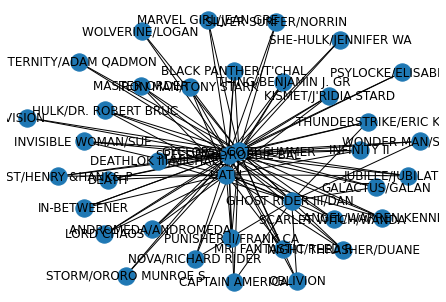

In [38]:
#http://jonathansoma.com/lede/algorithms-2017/classes/networks/networkx-graphs-from-source-target-dataframe/
#the above article helped me in Making networkx graphs from source-target DataFrames
#from_pandas_dataframe did not work for me so i used from_pandas_edgelist

edges=edges[500:600]
G=nx.from_pandas_edgelist(edges,source='hero1',target='hero2')
nx.draw(G,with_labels=True)

In [39]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 38
Number of edges: 100
Average degree:   5.2632


The total number of nodes in this graph is 38 and the number of edges is 100. The average number of times tha each hero comes along with another hero is 5.

**Diameter**

In [43]:
a.diameter(G)

2

**Shortest Average Path**

In [41]:
a.average_shortest_path_length(G)

1.8577524893314368

**Video Link**